In [1]:
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
import pandas as pd
import matplotlib
import gtrend   

plt.style.use('seaborn-darkgrid')
matplotlib.rcParams['font.family'] = ['Heiti TC']
def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)

def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)

In [2]:
pytrend = TrendReq()

In [3]:
brands =['Louis Vuitton', 'Gucci', 'Hermes', 'Dior', 'Bottega veneta'] 

In [4]:
brands_codes =[pytrend.suggestions(keyword=i)[0] for i in brands] 

In [5]:
df_brands= pd.DataFrame(brands_codes)

In [31]:
exact_keywords = df_brands['mid'].to_list()
start = "2020-01-01"
end = "2020-12-31"
category=185
search_type ='' 

In [32]:
dict = {}
i = 1
for keyword in exact_keywords:
    dict[i] = gtrend.get_daily_trend(pytrend, keyword, start, end, cat=category, gprop=search_type, verbose=True, tz=0)
    i = i + 1

Fetching '/m/03h90x' for period:2020-04-06 2020-12-31
Fetching '/m/03h90x' for period:2019-10-20 2020-07-15
Normalize by overlapping period:2020-04-06 2020-07-15
Fetching '/m/03h90x' for period:2019-05-04 2020-01-28
Normalize by overlapping period:2019-10-20 2020-01-28
Fetching '/m/03gc5x' for period:2020-04-06 2020-12-31
Fetching '/m/03gc5x' for period:2019-10-20 2020-07-15
Normalize by overlapping period:2020-04-06 2020-07-15
Fetching '/m/03gc5x' for period:2019-05-04 2020-01-28
Normalize by overlapping period:2019-10-20 2020-01-28
Fetching '/m/06dr8q' for period:2020-04-06 2020-12-31
Fetching '/m/06dr8q' for period:2019-10-20 2020-07-15
Normalize by overlapping period:2020-04-06 2020-07-15
Fetching '/m/06dr8q' for period:2019-05-04 2020-01-28
Normalize by overlapping period:2019-10-20 2020-01-28
Fetching '/m/04s4g6' for period:2020-04-06 2020-12-31
Fetching '/m/04s4g6' for period:2019-10-20 2020-07-15
Normalize by overlapping period:2020-04-06 2020-07-15
Fetching '/m/04s4g6' for per

In [49]:
df_brands_data = pd.concat(dict, axis=1)

In [51]:
df_brands_data.columns = df_brands_data.columns.droplevel(0) #drop outside header

In [52]:
df_brands_data

,/m/03h90x,overlap,/m/03gc5x,overlap,/m/06dr8q,overlap,/m/04s4g6,overlap,/m/04bnxg,overlap
date,,,,,,,,,,
2020-01-01,58.0,1.0,31.0,1.0,17.0,1.0,38.0,1.0,0.0,1.0
2020-01-02,60.0,1.0,30.0,1.0,45.0,1.0,42.0,1.0,20.0,1.0
2020-01-03,64.0,1.0,35.0,1.0,58.0,1.0,40.0,1.0,31.0,1.0
2020-01-04,63.0,1.0,37.0,1.0,46.0,1.0,36.0,1.0,33.0,1.0
2020-01-05,66.0,1.0,39.0,1.0,68.0,1.0,42.0,1.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,78.0,NaN,35.0,NaN,41.0,NaN,80.0,NaN,51.0,NaN
2020-12-28,67.0,NaN,30.0,NaN,39.0,NaN,70.0,NaN,49.0,NaN
2020-12-29,60.0,NaN,29.0,NaN,20.0,NaN,64.0,NaN,62.0,NaN


In [53]:
df_brands_data = df_brands_data.drop('overlap', axis = 1) #drop "overlap"

In [54]:
df_brands_data.columns=['Louis Vuitton','Gucci', 'Hermes', 'Dior', 'Bottega veneta']

In [55]:
df_brands_data

,Louis Vuitton,Gucci,Hermes,Dior,Bottega veneta
date,,,,,
2020-01-01,58.0,31.0,17.0,38.0,0.0
2020-01-02,60.0,30.0,45.0,42.0,20.0
2020-01-03,64.0,35.0,58.0,40.0,31.0
2020-01-04,63.0,37.0,46.0,36.0,33.0
2020-01-05,66.0,39.0,68.0,42.0,14.0
...,...,...,...,...,...
2020-12-27,78.0,35.0,41.0,80.0,51.0
2020-12-28,67.0,30.0,39.0,70.0,49.0
2020-12-29,60.0,29.0,20.0,64.0,62.0


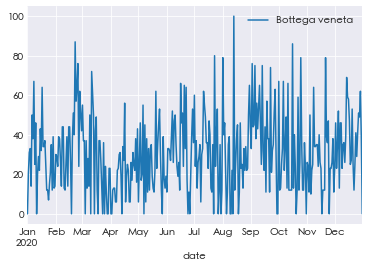

In [61]:
df_brands_data.plot(y = brands[4])